## **Inaugural Project**

In this project, we analyze an exchange economy model with two consumers (A and B) and two goods (x1 and x2). We begin by illustrating the set of Pareto improvements in an Edgeworth box and proceed to solve various optimization problems to find market-clearing prices and allocations that maximize utility under different constraints. Finally, we consider random initial endowments and analyze the resulting market equilibrium allocations.

### **Imports**

In [4]:
# Autoreload modules when code is run. Otherwise python will not reload the modules and changes will not be effective.
%load_ext autoreload
%autoreload 2

# Import packages used in the project
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.30","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 12})

# Import the class from the module
from inauguralproject import EdgeworthBoxClass 

# Set the parameters for alpha and beta and the initial endowments for consumer A and B.
alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]
endowment_B = [1 - e for e in endowment_A]
p1_values = np.linspace(0.5, 2.5, 75)  # Define the range for where p1 is defined initially.  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Question 1**


In this exercise, we illustrate the set of Pareto improvements in an Edgeworth box. The Pareto improvements are combinations of allocations that leave both consumers at least as well off as their initial endowments.

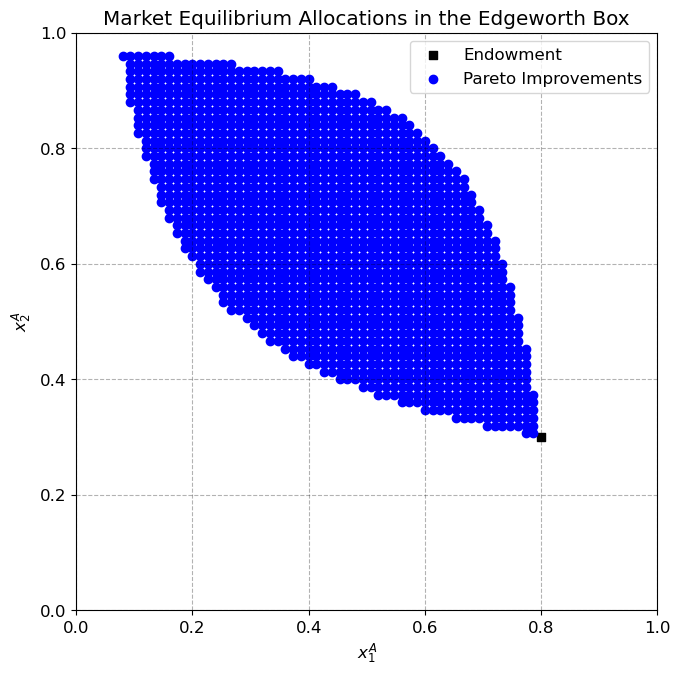

In [5]:
# Creates the EdgeworthBoxClass 
box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Plot the Edgeworth box
box.plot_edgeworth_box()

The figure above shows the Edgeworth box with the initial endowment and the set of Pareto improvements. Each blue point represents an allocation that is a Pareto improvement, indicating both consumers are at least as well off as their initial endowments.

### **Question 2**

In the market equilibrium we have demand equal to supply at the market clearing price p1*. However, if the price is not equal to p1* there we be an excess demand, which is measured by epsilon1 and epsilon2 on the market for good 1 and good 2. We find the excess demand for a variety of prices – which is known as the “error in the market clearing condition”. We make a graph to visualize the error. When the price of good 1 goes up we find the excess demand goes down. When it becomes negative, we have a excess supply. Inversely, when the price of good 1 goes up we see the excess demand for good 2 goes up as the consumers substitute towards this good that now becomes relatively cheaper. Furthermore, it is important to look at the intersection between the excess demand of good 1 and 2, which will be the market clearing price that we will also find in question 3. Naturally, this intersection happens at the point where points excess demands are equal to 0 – since this must be true in the equilibrium. To calculate and graph these excess demands we use the following code:

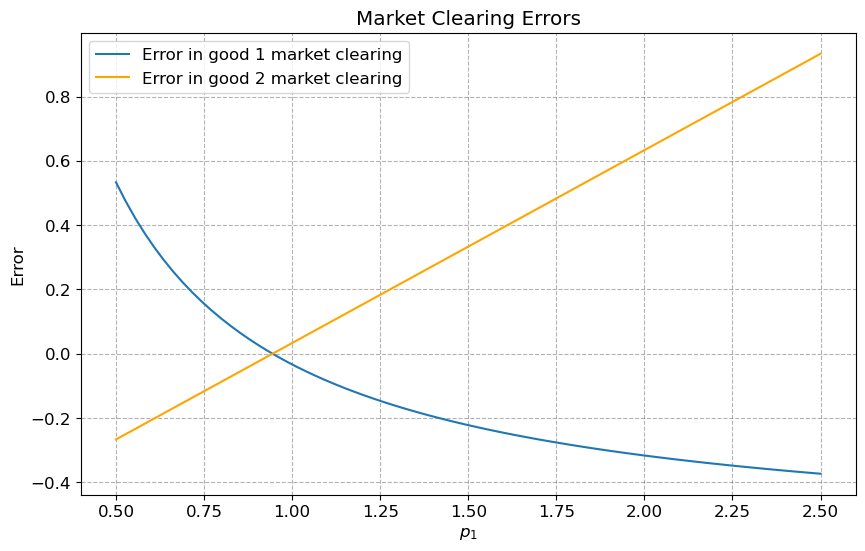

First 5 errors (p1, error in good 1, error in good 2):
p1: 0.50, error in good 1: 0.5333, error in good 2: -0.2667
p1: 0.53, error in good 1: 0.4752, error in good 2: -0.2505
p1: 0.55, error in good 1: 0.4228, error in good 2: -0.2342
p1: 0.58, error in good 1: 0.3752, error in good 2: -0.2180
p1: 0.61, error in good 1: 0.3319, error in good 2: -0.2018


In [6]:
# 1. Define the range for p1
p1_values = np.linspace(0.5, 2.5, 75)  # Define the range for p1

# 2. Plot the market claering errors
box.plot_market_clearing_errors(p1_values)

# 3. Calculate and print the first 5 errors as an example
errors = box.market_clearing_errors(p1_values)
first_five_errors = errors[:5]
print("First 5 errors (p1, error in good 1, error in good 2):")
for error in first_five_errors:
    print(f"p1: {error[0]:.2f}, error in good 1: {error[1]:.4f}, error in good 2: {error[2]:.4f}")

# Question 3

Now we find the market clearing price, as we also mentioned in question 2 – where it can be seen at the graphical intersection between the two excess demands. The market clearing price for p1 is equal to 0,94. Therefore, the relative price of p1/p2 is also equal to 0,94 since we have set p2 numerarie (p2=1). To calculate the market clearing price we use the following code:

In [7]:
edgeworth_box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Find the market clearing price
market_clearing_price, error = edgeworth_box.find_market_clearing_price()

# Find the allocations at the market clearing price
allocation_A, allocation_B = edgeworth_box.allocation_at_price(market_clearing_price)

print(f"Market clearing price p1: {market_clearing_price:.3f}")
print(f"Allocation for person A: Good 1: {allocation_A[0]:.3f}, Good 2: {allocation_A[1]:.3f}")
print(f"Allocation for person B: Good 1: {allocation_B[0]:.3f}, Good 2: {allocation_B[1]:.3f}")

Market clearing price p1: 0.944
Allocation for person A: Good 1: 0.373, Good 2: 0.704
Allocation for person B: Good 1: 0.627, Good 2: 0.296


# Question 4.a

In this question person A is a price-setter acting in own self-interest (maximizing own utility). 
To start with we assume any price can be set in P1. We find that A chooses a price of 2,5 which is in P1. This results in an allocation where A consumes 0,31 of good 1 and 1,53 of good 2 and consumer B consumes 0,32 of good 1 and 0,40 of good 2. To find the allocation in the case of 4.a we have used the following code:


In [9]:
# Initial utilities
initial_uA = edgeworth_box.u_A(endowment_A[0], endowment_A[1])
initial_uB = edgeworth_box.u_B(endowment_B[0], endowment_B[1])

# 4.a Maximize utility for A with restricted prices in P1
best_p1_restricted, max_utility_A_restricted, allocation_A_restricted, allocation_B_restricted = edgeworth_box.maximize_utility_A_restricted(p1_values)

if best_p1_restricted is not None:
    print(f"Restricted - Best p1: {best_p1_restricted:.3f}")
    print(f"Restricted - Optimal utility for A: {max_utility_A_restricted:.3f}")
    print(f"Restricted - Allocation for A: Good 1: {allocation_A_restricted[0]:.3f}, Good 2: {allocation_A_restricted[1]:.3f}")
    print(f"Restricted - Allocation for B: Good 1: {allocation_B_restricted[0]:.3f}, Good 2: {allocation_B_restricted[1]:.3f}")
else:
    print("Restricted optimization was unsuccessful.")


Restricted - Best p1: 1.905
Restricted - Optimal utility for A: 0.634
Restricted - Allocation for A: Good 1: 0.622, Good 2: 0.640
Restricted - Allocation for B: Good 1: 0.378, Good 2: 0.360


# Question 4.b

In question 4.b we proceed to look at the more realistic assumption of a positive price only. 
We find that A chooses a price of … which is strictly positive. This results in an allocation where A consumes 0,62 of good 1 and 0,64 of good 2. To find the allocation in the case of 4.b we have used the following code:

In [10]:
# 4.b Maximize utility for A with any positive price
optimal_p1_4b, optimal_uA_4b, allocation_A_unrestricted, allocation_B_unrestricted = edgeworth_box.maximize_utility_A_unrestricted()

if optimal_p1_4b is not None:
    print(f"Unrestricted - Best p1: {optimal_p1_4b:.3f}")
    print(f"Unrestricted - Optimal utility for A: {optimal_uA_4b:.3f}")
    print(f"Unrestricted - Allocation for A: Good 1: {allocation_A_unrestricted[0]:.3f}, Good 2: {allocation_A_unrestricted[1]:.3f}")
    print(f"Unrestricted - Allocation for B: Good 1: {allocation_B_unrestricted[0]:.3f}, Good 2: {allocation_B_unrestricted[1]:.3f}")
else:
    print("Unrestricted optimization was unsuccessful.")


Unrestricted - Best p1: 1.899
Unrestricted - Optimal utility for A: 0.634
Unrestricted - Allocation for A: Good 1: 0.621, Good 2: 0.640
Unrestricted - Allocation for B: Good 1: 0.379, Good 2: 0.360


# Question 5.a

Here in 5.a we have a situation where A can choose the allocation freely within the pareto efficient allocations – meaning that A cannot chose an allocation where B is worse off than initially. To find the optimal allocation that A will choose in 5.a we use the following code:

In [11]:
# 5.a Maximize utility for A within the restricted set C
allocation_A_restricted_C, allocation_B_restricted_C = edgeworth_box.maximize_utility_A_restricted_C()

if allocation_A_restricted_C is not None:
    print(f"5.a Allocation for A within C: Good 1: {allocation_A_restricted_C[0]:.3f}, Good 2: {allocation_A_restricted_C[1]:.3f}")
    print(f"5.a Allocation for B within C: Good 1: {allocation_B_restricted_C[0]:.3f}, Good 2: {allocation_B_restricted_C[1]:.3f}")
else:
    print("5.a Optimization within C was unsuccessful.")



5.a Allocation for A within C: Good 1: 0.560, Good 2: 0.853
5.a Allocation for B within C: Good 1: 0.440, Good 2: 0.147


# Question 5.b

In 5.b we calculate the allocation again with the restrictions given in the text for 5.b. This allocation is marginally different from 5.a, since we now have a wider range of prices to choose from as we are not limited to discrete intervals but can choose all continuous prices (as long as they are strictly positive). To do so, we use the following code:

In [12]:
# 5.b Maximize utility for A with no further restrictions
allocation_A_no_restrictions, allocation_B_no_restrictions, max_uA_no_restrictions = edgeworth_box.maximize_utility_A_no_restrictions()

if allocation_A_no_restrictions is not None:
    print(f"5.b Allocation for A with no restrictions: Good 1: {allocation_A_no_restrictions[0]:.3f}, Good 2: {allocation_A_no_restrictions[1]:.3f}")
    print(f"5.b Utility for A with no restrictions: {max_uA_no_restrictions:.3f}")

    # Calculate and print the allocation for consumer B
    print(f"5.b Allocation for B with no restrictions: Good 1: {allocation_B_no_restrictions[0]:.3f}, Good 2: {allocation_B_no_restrictions[1]:.3f}")
else:
    print("Optimization failed.")



5.b Allocation for A with no restrictions: Good 1: 0.576, Good 2: 0.844
5.b Utility for A with no restrictions: 0.743
5.b Allocation for B with no restrictions: Good 1: 0.424, Good 2: 0.156


# Question 6.a

Now the allocation is chosen by a social planner, who maximizes the total utility of both A and B – thus the maximization problem is not only in A’s self-interest now. To find the allocation we use the following code:

In [13]:


# 6.a Maximize total utility for society
allocation_A, allocation_B, max_total_utility = edgeworth_box.maximize_total_utility()

if allocation_A is not None:
    print(f"6.a Allocation for A: Good 1: {allocation_A[0]:.3f}, Good 2: {allocation_A[1]:.3f}")
    print(f"6.a Allocation for B: Good 1: {allocation_B[0]:.3f}, Good 2: {allocation_B[1]:.3f}")
    print(f"6.a Maximum total utility for society: {max_total_utility:.3f}")
else:
    print("Optimization failed.")


6.a Allocation for A: Good 1: 0.333, Good 2: 0.667
6.a Allocation for B: Good 1: 0.667, Good 2: 0.333
6.a Maximum total utility for society: 1.058


# Question 6.b

Here we illustrate the result as compared to question 3-5, to show that the social planner will choose a price with 0 excess demand which aligns with question 3 where we had the market clearing price which is socially optimal due to the first welfare theorem. However, in question 4 and 5 we did not have the market clearing price and thus not a socially optimal allocation. In this outcome A is better off with a higher allocation, but B is worse off and more worse off than A's utility is increased as compared to question 3. The pros of allocation 3 is that the market itself makes sure there is no excess demand on both the market for good 1 and 2 according to the Walrasian law. Here we get a socially optimal allocation from a positive economical viewpoint. However, there is no ensuring this outcome is equally distributed. If we want a more equal outcome we might need to set prices outside the market or have government intervention. 

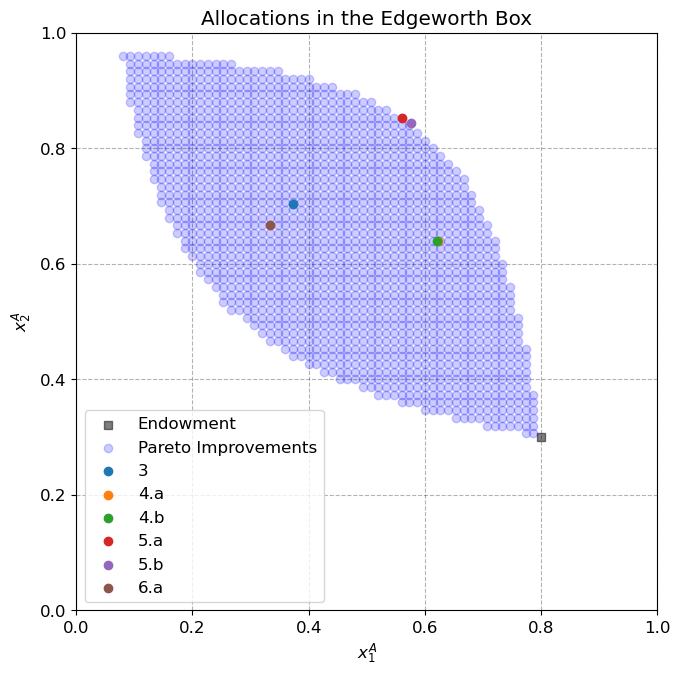

In [14]:
# Get the allocations from the class method
allocations = edgeworth_box.get_allocations()

# Plot the Edgeworth box with the allocations
edgeworth_box.plot_edgeworth_box_with_allocations(allocations)


# Question 7

Now we consider the random set of initial allocations, W, which we draw with 50 elements using the following code:

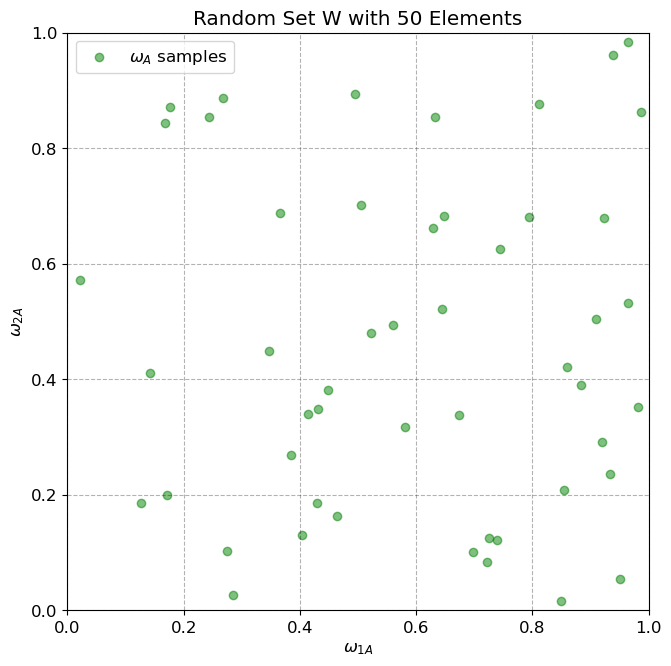

In [15]:
# Import the RandomEndowments class from the updated py file
from inauguralproject import RandomEndowments

# Initialize the model with given parameters
random_model = RandomEndowments()

# Generate random endowments
omega_A, omega_B = random_model.generate_random_endowments(seed=1992, num_samples=50)

# Plot the random endowments
random_model.plot_random_endowments(omega_A)


# Question 8

Finally, we find the market equilibrium allocation for each initial allocation in W and draw it in the Edgeworth box using the following code:

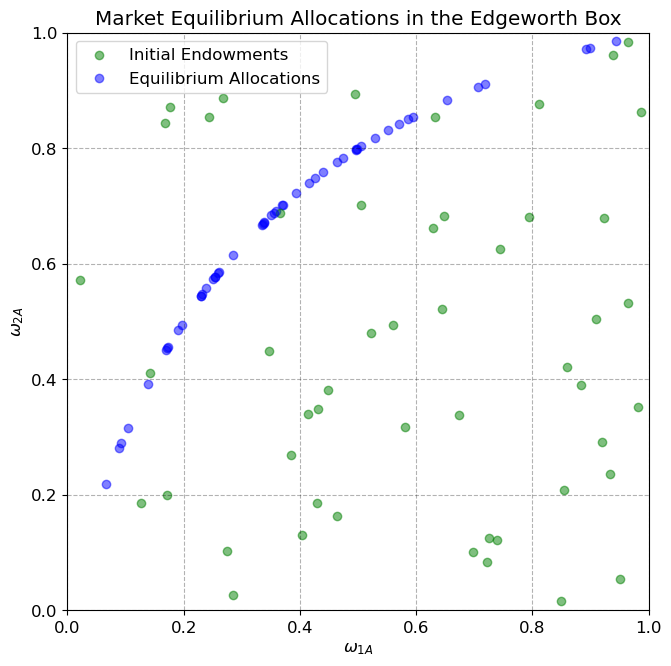

In [16]:
# Import the RandomEndowments class from the updated py file
from inauguralproject import RandomEndowments

# Initialize the model with given parameters
market_model = RandomEndowments()

# Generate random endowments
omega_A, omega_B = market_model.generate_random_endowments(seed=1992, num_samples=50)

# Plot the market equilibrium allocations
market_model.plot_market_equilibrium(omega_A)

